In [1]:
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


### Canny로 이미지 생성

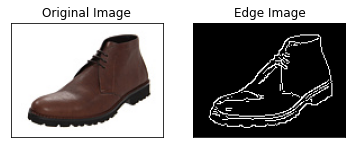

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('data_new/boots.jpg')
edges = cv2.Canny(img,50,120)

plt.subplot(121),plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
 
plt.show()

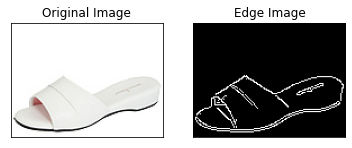

In [32]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('data_new/slipper.jpg')
edges = cv2.Canny(img,50,120)

plt.subplot(121),plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
 
plt.show()

In [34]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('data_new/slipper.jpg')
edges = cv2.Canny(img,50,120)

cv2.imwrite('data_new/slipper_Edge.jpg',edges) # 이미지 저장하기. cv2.imwrite(img경로+이름, 저장할 파일)

True

In [63]:
#Canny Edge

import os 
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 폴더 만들기

# os.mkdir('./canny_dt') # 메인 폴더

# os.

# 원본 폴더 
original_dataset_dir = 'data_new/shoes_data'

filelist = []
basedirs = os.listdir(original_dataset_dir)

os.mkdir('data_new/Canny_shoes_data')
# 폴더 만들기
for dirs in basedirs : # 첫 번째 폴더 (Boots, sandals 등)
    new_dir_path = 'data_new/Canny_shoes_data/'+dirs
    os.mkdir(new_dir_path) # 첫 번째 폴더 생성하기
    subdir = os.listdir(original_dataset_dir+'/'+dirs)
    for sub_d in subdir: #두 번째 폴더 (Ankle 등)
        new_sub_d_path = new_dir_path + '/' + sub_d
        os.mkdir(new_sub_d_path) # 두 번째 폴더 생성하기
        sub_subdir = os.listdir(original_dataset_dir+'/'+dirs+'/'+sub_d)
        for sub_sub_d in sub_subdir: # 세 번째 폴더 
            new_sub_sub_d_path = new_sub_d_path + '/' + sub_sub_d 
            os.mkdir(new_sub_sub_d_path) # 세 번째 폴더 생성하기
            new_path = original_dataset_dir+'/'+dirs+'/'+sub_d+'/'+sub_sub_d
            new_imgs = os.listdir(new_path)
            for imgs in new_imgs:
                img_path = new_path + '/' + imgs
                img_save_path = new_sub_sub_d_path + '/' + imgs
                img = cv2.imread(img_path)
                edges = cv2.Canny(img,50,120) #Canny로 이미지 추출하기
                cv2.imwrite(img_save_path,edges) # 파일 저장하기
                
                
print("끝")






끝


In [61]:
def compute_fast_det(filename, is_nms=True, thresh =10): # thresh는 임계 값(t),

    img = cv2.imread(filename)

    # Initiate FAST object with default values # 디텍터 초기화
    fast = cv2.FastFeatureDetector_create() 
    # find and draw the keypoints 
    if not is_nms:
        fast.setNonmaxSuppression(0)
    fast.setThreshold(thresh) #임계값 적용
    kp = fast.detect(img,None) # 검출 
    cv2.drawKeypoints(img, kp, img, color=(255,0,0)) #키 포인트 그리기
    return img

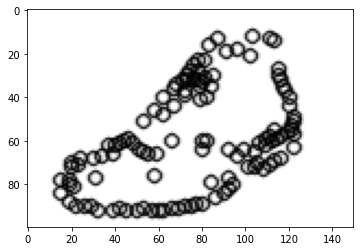

In [62]:
img = cv2.imread('data_new/boots.jpg')
back = cv2.imread('data_new/white_face.jpg')
back = back[:100,:150]
fast = cv2.FastFeatureDetector_create() 
# find and draw the keypoints 
fast.setThreshold(10) #임계값 적용
kp = fast.detect(img,None) # 검출 
outimg = cv2.drawKeypoints(back, kp, back, color=(0,0,0))
plt.imshow(outimg)

In [82]:
len(kp)

120

In [85]:
for i,feature in enumerate(kp):
        array = np.zeros(0)
        x=int(feature.pt[0])
        y=int(feature.pt[1])
        array[x][y]=1
    

IndexError: index 103 is out of bounds for axis 0 with size 0

In [86]:
# FastFeature

import os 
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 폴더 만들기

# os.mkdir('./canny_dt') # 메인 폴더

# os.

# 원본 폴더 
original_dataset_dir = 'data_new/shoes_data'

filelist = []
basedirs = os.listdir(original_dataset_dir)

os.mkdir('data_new/Fast_shoes_data')
# 폴더 만들기
for dirs in basedirs : # 첫 번째 폴더 (Boots, sandals 등)
    new_dir_path = 'data_new/Fast_shoes_data/'+dirs
    os.mkdir(new_dir_path) # 첫 번째 폴더 생성하기
    subdir = os.listdir(original_dataset_dir+'/'+dirs)
    for sub_d in subdir: #두 번째 폴더 (Ankle 등)
        new_sub_d_path = new_dir_path + '/' + sub_d
        os.mkdir(new_sub_d_path) # 두 번째 폴더 생성하기
        sub_subdir = os.listdir(original_dataset_dir+'/'+dirs+'/'+sub_d)
        for sub_sub_d in sub_subdir: # 세 번째 폴더 
            new_sub_sub_d_path = new_sub_d_path + '/' + sub_sub_d 
            os.mkdir(new_sub_sub_d_path) # 세 번째 폴더 생성하기
            new_path = original_dataset_dir+'/'+dirs+'/'+sub_d+'/'+sub_sub_d
            new_imgs = os.listdir(new_path)
            for imgs in new_imgs:
                img_path = new_path + '/' + imgs
                img_save_path = new_sub_sub_d_path + '/' + imgs
                img = cv2.imread(img_path)
                back = cv2.imread('data_new/white_face.jpg')
                back = back[:100,:150]
                fast = cv2.FastFeatureDetector_create() 
                # find and draw the keypoints 
                fast.setThreshold(10) #임계값 적용
                kp = fast.detect(img,None) # 검출 
                outimg = cv2.drawKeypoints(back, kp, back, color=(0,0,0))
                cv2.imwrite(img_save_path,outimg) # 파일 저장하기
                
print("끝")



끝


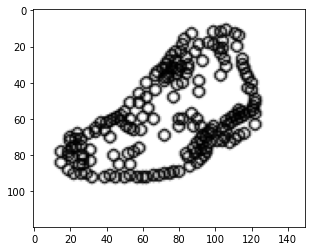

In [251]:
img = cv2.imread('data_new/boots.jpg')
back = cv2.imread('data_new/white_face.jpg')
back = back[:120,:150]
fast = cv2.FastFeatureDetector_create() 
# find and draw the keypoints 
fast.setThreshold(5) #임계값 적용
kp = fast.detect(img,None) # 검출 
outimg = cv2.drawKeypoints(back, kp, back, color=(0,0,0))
plt.imshow(outimg)

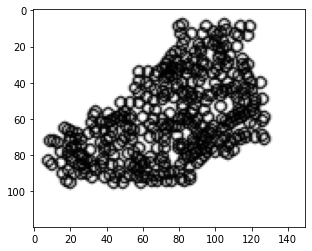

In [254]:
img = cv2.imread('data_new/boots.jpg')
back = cv2.imread('data_new/white_face.jpg')
back = back[:120,:150]
fast = cv2.FastFeatureDetector_create() 
# find and draw the keypoints 
fast.setThreshold(1) #임계값 적용
kp = fast.detect(img,None) # 검출 
outimg_1 = cv2.drawKeypoints(back, kp, back, color=(0,0,0))
plt.imshow(outimg_1)

In [256]:
array = np.zeros((120,150))
for i,feature in enumerate(kp):
        x=int(feature.pt[0])
        y=int(feature.pt[1])
        array[y][x] = 255

(-0.5, 149.5, 119.5, -0.5)

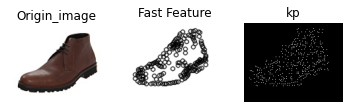

In [257]:

fig, ax = plt.subplots(nrows=1, ncols=3)

ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].set_title('Origin_image')
ax[0].axis('off')

ax[1].imshow(outimg, cmap='gray')
ax[1].set_title('Fast Feature')
ax[1].axis('off')

ax[2].imshow(array, cmap='gray')
ax[2].set_title('kp')
ax[2].axis('off')

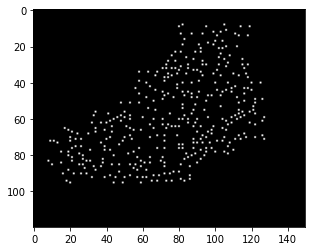

In [258]:
plt.imshow(array, cmap='gray')

In [215]:
cv2.imwrite('data_new/array.jpg', array)

True

In [260]:
# Array_threshold = 10, 5, 3, 1 변경하여 생성 변경하여 생성

import os 
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 폴더 만들기

# os.mkdir('./canny_dt') # 메인 폴더

# os.

# 원본 폴더 
original_dataset_dir = 'data_new/shoes_data'

filelist = []
basedirs = os.listdir(original_dataset_dir)

os.mkdir('data_new/threshold_1')
# 폴더 만들기
for dirs in basedirs : # 첫 번째 폴더 (Boots, sandals 등)
    new_dir_path = 'data_new/threshold_1/'+dirs
    os.mkdir(new_dir_path) # 첫 번째 폴더 생성하기
    subdir = os.listdir(original_dataset_dir+'/'+dirs)
    for sub_d in subdir: #두 번째 폴더 (Ankle 등)
        new_sub_d_path = new_dir_path + '/' + sub_d
        os.mkdir(new_sub_d_path) # 두 번째 폴더 생성하기
        sub_subdir = os.listdir(original_dataset_dir+'/'+dirs+'/'+sub_d)
        for sub_sub_d in sub_subdir: # 세 번째 폴더 
            new_sub_sub_d_path = new_sub_d_path + '/' + sub_sub_d 
            os.mkdir(new_sub_sub_d_path) # 세 번째 폴더 생성하기
            new_path = original_dataset_dir+'/'+dirs+'/'+sub_d+'/'+sub_sub_d
            new_imgs = os.listdir(new_path)
            for imgs in new_imgs:
                img_path = new_path + '/' + imgs
                img_save_path = new_sub_sub_d_path + '/' + imgs
                img = cv2.imread(img_path)
                back = cv2.imread('data_new/white_face.jpg')
                back = back[:120,:150]
                fast = cv2.FastFeatureDetector_create() 
                # find and draw the keypoints 
                fast.setThreshold(1) #임계값 적용
                kp = fast.detect(img,None) # 검출 
                array = np.zeros((120,150))
                for i,feature in enumerate(kp):
                        x=int(feature.pt[0])
                        y=int(feature.pt[1])
                        array[y][x] = 255
                cv2.imwrite(img_save_path,array) # 파일 저장하기
                
                
print("끝")


끝


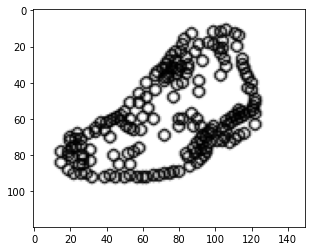

In [263]:
# Array 이용하기

import os 
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('data_new/boots1.jpg')
back = cv2.imread('data_new/white_face.jpg')
back = back[:120,:150]
fast = cv2.FastFeatureDetector_create() 
# find and draw the keypoints 
fast.setThreshold(5) #임계값 적용
kp = fast.detect(img,None) # 검출 
outimg = cv2.drawKeypoints(back, kp, back, color=(0,0,0))
plt.imshow(outimg)

In [267]:
array = np.zeros((120,150))
for i,feature in enumerate(kp):
        x=int(feature.pt[0])
        y=int(feature.pt[1])
        array[y][x] = 1
array

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## 코사인 유사도를 이용하기
- Cosin 유사도를 통해, 신발의 유사도를 확인하기

- 1. boots1, 2, 3 의 array를 구해 평균을 구한다.
- 2. 평균과 boots1, 2, 3의 유사도를 확인한다.
- 3. 평균과 다른 boots와의 유사도를 확인해본다

In [2]:
# Array 이용하기. 임계값은 10으로 고정. array 값은 1로 잡아두기. 평균하였을 때 겹치치 않는 값은 버리기 위함
def compute_fast_array(filename, is_nms=True, thresh =10): # thresh는 임계 값(t),

    img = cv2.imread(filename)

    # Initiate FAST object with default values # 디텍터 초기화
    fast = cv2.FastFeatureDetector_create() 
    # find and draw the keypoints 
    if not is_nms:
        fast.setNonmaxSuppression(0)
    fast.setThreshold(thresh) #임계값 적용
    kp = fast.detect(img,None) # 검출 
    array = np.zeros((120, 150))
    for i, feature in enumerate(kp):
        x = int(feature.pt[0])
        y = int(feature.pt[1])
        array[y][x] = 1
        
    return array

(-0.5, 149.5, 119.5, -0.5)

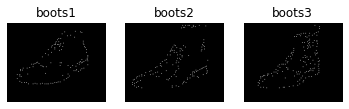

In [3]:
# Array 이용하기. 임계값은 10으로 고정.

import os 
import cv2
import numpy as np
from matplotlib import pyplot as plt

img1 ='data_new/boots1.jpg'
img2 ='data_new/boots2.jpg'
img3 ='data_new/boots3.jpg'
array_1 = compute_fast_array(img1)
array_2 = compute_fast_array(img2)
array_3 = compute_fast_array(img3)


fig, ax = plt.subplots(nrows=1, ncols=3)

ax[0].imshow(array_1, cmap = 'gray')
ax[0].set_title('boots1')
ax[0].axis('off')

ax[1].imshow(array_2, cmap='gray')
ax[1].set_title('boots2')
ax[1].axis('off')

ax[2].imshow(array_3, cmap='gray')
ax[2].set_title('boots3')
ax[2].axis('off')

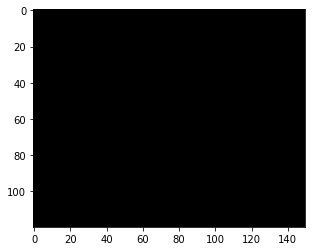

In [4]:
# 1. 신발의 배열 평균 값 구하기 (몫으로 구해보자)
array_avr = ((array_1 + array_2 + array_3)//3)
plt.imshow(array_avr, cmap='gray')

- 겹치는 것이 없으니, 몫으로 평균 값 구하는 것은 실패
- threshold 값이 10이기 때문에, 특징 값이 적게 나오는 것 같다.
- threshold 값을 5와 3, 1로 설정하여 특징을 전보다 많이 추출하고 몫으로 평균을 구할 수 있을지 확인해보자.

- Array 이용하기. 임계값은 5으로 고정. array 값은 1로 잡아두기. 평균하였을 때 겹치치 않는 값은 버리기 위함


In [5]:
# Array 이용하기. 임계값은 5으로 고정. array 값은 1로 잡아두기. 평균하였을 때 겹치치 않는 값은 버리기 위함
def compute_fast_array(filename, is_nms=True, thresh =5): # thresh는 임계 값(t),

    img = cv2.imread(filename)

    # Initiate FAST object with default values # 디텍터 초기화
    fast = cv2.FastFeatureDetector_create() 
    # find and draw the keypoints 
    if not is_nms:
        fast.setNonmaxSuppression(0)
    fast.setThreshold(thresh) #임계값 적용
    kp = fast.detect(img,None) # 검출 
    array = np.zeros((120, 150))
    for i, feature in enumerate(kp):
        x = int(feature.pt[0])
        y = int(feature.pt[1])
        array[y][x] = 1
        
    return array

(-0.5, 149.5, 119.5, -0.5)

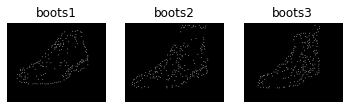

In [6]:
import os 
import cv2
import numpy as np
from matplotlib import pyplot as plt

img1 ='data_new/boots1.jpg'
img2 ='data_new/boots2.jpg'
img3 ='data_new/boots3.jpg'
array_1 = compute_fast_array(img1)
array_2 = compute_fast_array(img2)
array_3 = compute_fast_array(img3)

fig, ax = plt.subplots(nrows=1, ncols=3)

ax[0].imshow(array_1, cmap = 'gray')
ax[0].set_title('boots1')
ax[0].axis('off')

ax[1].imshow(array_2, cmap='gray')
ax[1].set_title('boots2')
ax[1].axis('off')

ax[2].imshow(array_3, cmap='gray')
ax[2].set_title('boots3')
ax[2].axis('off')

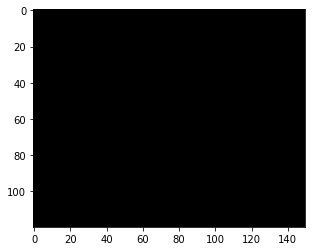

In [7]:

array_avr = ((array_1 + array_2 + array_3)//3)
plt.imshow(array_avr, cmap='gray')

- Array 이용하기. 임계값은 3으로 고정. array 값은 1로 잡아두기. 평균하였을 때 겹치치 않는 값은 버리기 위함


In [8]:
# Array 이용하기. 임계값은 3으로 고정. array 값은 1로 잡아두기. 평균하였을 때 겹치치 않는 값은 버리기 위함
def compute_fast_array(filename, is_nms=True, thresh =3): # thresh는 임계 값(t),

    img = cv2.imread(filename)

    # Initiate FAST object with default values # 디텍터 초기화
    fast = cv2.FastFeatureDetector_create() 
    # find and draw the keypoints 
    if not is_nms:
        fast.setNonmaxSuppression(0)
    fast.setThreshold(thresh) #임계값 적용
    kp = fast.detect(img,None) # 검출 
    array = np.zeros((120, 150))
    for i, feature in enumerate(kp):
        x = int(feature.pt[0])
        y = int(feature.pt[1])
        array[y][x] = 1
        
    return array

(-0.5, 149.5, 119.5, -0.5)

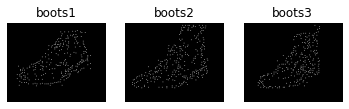

In [9]:
import os 
import cv2
import numpy as np
from matplotlib import pyplot as plt

img1 ='data_new/boots1.jpg'
img2 ='data_new/boots2.jpg'
img3 ='data_new/boots3.jpg'
array_1 = compute_fast_array(img1)
array_2 = compute_fast_array(img2)
array_3 = compute_fast_array(img3)

fig, ax = plt.subplots(nrows=1, ncols=3)

ax[0].imshow(array_1, cmap = 'gray')
ax[0].set_title('boots1')
ax[0].axis('off')

ax[1].imshow(array_2, cmap='gray')
ax[1].set_title('boots2')
ax[1].axis('off')

ax[2].imshow(array_3, cmap='gray')
ax[2].set_title('boots3')
ax[2].axis('off')

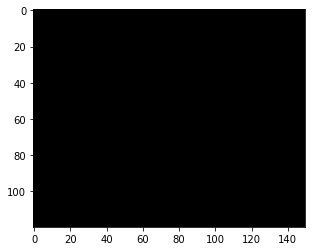

In [10]:

array_avr = ((array_1 + array_2 + array_3)//3)
plt.imshow(array_avr, cmap='gray')

- Array 이용하기. 임계값은 1으로 고정. array 값은 1로 잡아두기. 평균하였을 때 겹치치 않는 값은 버리기 위함


In [11]:
# Array 이용하기. 임계값은 1으로 고정. array 값은 1로 잡아두기. 평균하였을 때 겹치치 않는 값은 버리기 위함
def compute_fast_array(filename, is_nms=True, thresh =1): # thresh는 임계 값(t),

    img = cv2.imread(filename)

    # Initiate FAST object with default values # 디텍터 초기화
    fast = cv2.FastFeatureDetector_create() 
    # find and draw the keypoints 
    if not is_nms:
        fast.setNonmaxSuppression(0)
    fast.setThreshold(thresh) #임계값 적용
    kp = fast.detect(img,None) # 검출 
    array = np.zeros((120, 150))
    for i, feature in enumerate(kp):
        x = int(feature.pt[0])
        y = int(feature.pt[1])
        array[y][x] = 1
        
    return array

(-0.5, 149.5, 119.5, -0.5)

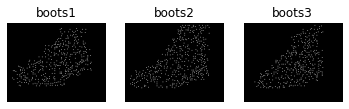

In [12]:
import os 
import cv2
import numpy as np
from matplotlib import pyplot as plt

img1 ='data_new/boots1.jpg'
img2 ='data_new/boots2.jpg'
img3 ='data_new/boots3.jpg'
array_1 = compute_fast_array(img1)
array_2 = compute_fast_array(img2)
array_3 = compute_fast_array(img3)

fig, ax = plt.subplots(nrows=1, ncols=3)

ax[0].imshow(array_1, cmap = 'gray')
ax[0].set_title('boots1')
ax[0].axis('off')

ax[1].imshow(array_2, cmap='gray')
ax[1].set_title('boots2')
ax[1].axis('off')

ax[2].imshow(array_3, cmap='gray')
ax[2].set_title('boots3')
ax[2].axis('off')

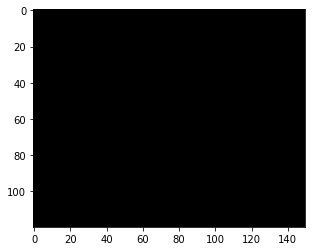

In [13]:
array_avr = ((array_1 + array_2 + array_3)//3)
plt.imshow(array_avr, cmap='gray')

- 세 그림의 특징 들이 겹치는 부분이 없어서, 모두 그림이 나오지 않는다.
- 둘 중 하나의 특징이 겹치면 추출이 되는 것으로 변경해서 10, 5, 3, 1 모두 진행


In [14]:
# Array 이용하기. 임계값은 10으로 고정. array 값은 1로 잡아두기. 평균하였을 때 겹치치 않는 값은 버리기 위함
def compute_fast_array(filename, is_nms=True, thresh =10): # thresh는 임계 값(t),

    img = cv2.imread(filename)

    # Initiate FAST object with default values # 디텍터 초기화
    fast = cv2.FastFeatureDetector_create() 
    # find and draw the keypoints 
    if not is_nms:
        fast.setNonmaxSuppression(0)
    fast.setThreshold(thresh) #임계값 적용
    kp = fast.detect(img,None) # 검출 
    array = np.zeros((120, 150))
    for i, feature in enumerate(kp):
        x = int(feature.pt[0])
        y = int(feature.pt[1])
        array[y][x] = 1
        
    return array

(-0.5, 149.5, 119.5, -0.5)

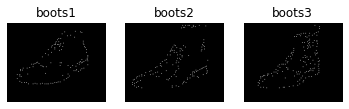

In [15]:
# Array 이용하기. 임계값은 10으로 고정.

import os 
import cv2
import numpy as np
from matplotlib import pyplot as plt

img1 ='data_new/boots1.jpg'
img2 ='data_new/boots2.jpg'
img3 ='data_new/boots3.jpg'
array_1 = compute_fast_array(img1)
array_2 = compute_fast_array(img2)
array_3 = compute_fast_array(img3)


fig, ax = plt.subplots(nrows=1, ncols=3)

ax[0].imshow(array_1, cmap = 'gray')
ax[0].set_title('boots1')
ax[0].axis('off')

ax[1].imshow(array_2, cmap='gray')
ax[1].set_title('boots2')
ax[1].axis('off')

ax[2].imshow(array_3, cmap='gray')
ax[2].set_title('boots3')
ax[2].axis('off')

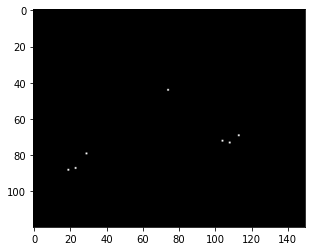

In [16]:
# 1. 신발의 배열 평균 값 구하기 (몫으로 구해보자)
array_avr = ((array_1 + array_2 + array_3)//2)
plt.imshow(array_avr, cmap='gray')

- Array 이용하기. 임계값은 5으로 고정. array 값은 1로 잡아두기. 평균하였을 때 겹치치 않는 값은 버리기 위함


In [17]:
# Array 이용하기. 임계값은 5으로 고정. array 값은 1로 잡아두기. 평균하였을 때 겹치치 않는 값은 버리기 위함
def compute_fast_array(filename, is_nms=True, thresh =5): # thresh는 임계 값(t),

    img = cv2.imread(filename)

    # Initiate FAST object with default values # 디텍터 초기화
    fast = cv2.FastFeatureDetector_create() 
    # find and draw the keypoints 
    if not is_nms:
        fast.setNonmaxSuppression(0)
    fast.setThreshold(thresh) #임계값 적용
    kp = fast.detect(img,None) # 검출 
    array = np.zeros((120, 150))
    for i, feature in enumerate(kp):
        x = int(feature.pt[0])
        y = int(feature.pt[1])
        array[y][x] = 1
        
    return array

(-0.5, 149.5, 119.5, -0.5)

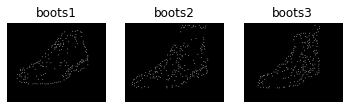

In [18]:
import os 
import cv2
import numpy as np
from matplotlib import pyplot as plt

img1 ='data_new/boots1.jpg'
img2 ='data_new/boots2.jpg'
img3 ='data_new/boots3.jpg'
array_1 = compute_fast_array(img1)
array_2 = compute_fast_array(img2)
array_3 = compute_fast_array(img3)

fig, ax = plt.subplots(nrows=1, ncols=3)

ax[0].imshow(array_1, cmap = 'gray')
ax[0].set_title('boots1')
ax[0].axis('off')

ax[1].imshow(array_2, cmap='gray')
ax[1].set_title('boots2')
ax[1].axis('off')

ax[2].imshow(array_3, cmap='gray')
ax[2].set_title('boots3')
ax[2].axis('off')

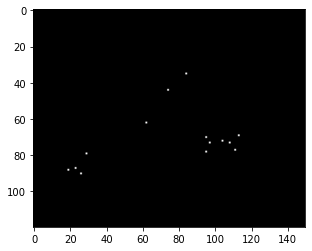

In [19]:

array_avr = ((array_1 + array_2 + array_3)//2)
plt.imshow(array_avr, cmap='gray')

- Array 이용하기. 임계값은 3으로 고정. array 값은 1로 잡아두기. 평균하였을 때 겹치치 않는 값은 버리기 위함


In [20]:
# Array 이용하기. 임계값은 3으로 고정. array 값은 1로 잡아두기. 평균하였을 때 겹치치 않는 값은 버리기 위함
def compute_fast_array(filename, is_nms=True, thresh =3): # thresh는 임계 값(t),

    img = cv2.imread(filename)

    # Initiate FAST object with default values # 디텍터 초기화
    fast = cv2.FastFeatureDetector_create() 
    # find and draw the keypoints 
    if not is_nms:
        fast.setNonmaxSuppression(0)
    fast.setThreshold(thresh) #임계값 적용
    kp = fast.detect(img,None) # 검출 
    array = np.zeros((120, 150))
    for i, feature in enumerate(kp):
        x = int(feature.pt[0])
        y = int(feature.pt[1])
        array[y][x] = 1
        
    return array

(-0.5, 149.5, 119.5, -0.5)

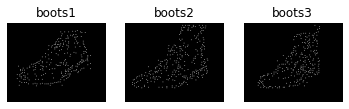

In [21]:
import os 
import cv2
import numpy as np
from matplotlib import pyplot as plt

img1 ='data_new/boots1.jpg'
img2 ='data_new/boots2.jpg'
img3 ='data_new/boots3.jpg'
array_1 = compute_fast_array(img1)
array_2 = compute_fast_array(img2)
array_3 = compute_fast_array(img3)

fig, ax = plt.subplots(nrows=1, ncols=3)

ax[0].imshow(array_1, cmap = 'gray')
ax[0].set_title('boots1')
ax[0].axis('off')

ax[1].imshow(array_2, cmap='gray')
ax[1].set_title('boots2')
ax[1].axis('off')

ax[2].imshow(array_3, cmap='gray')
ax[2].set_title('boots3')
ax[2].axis('off')

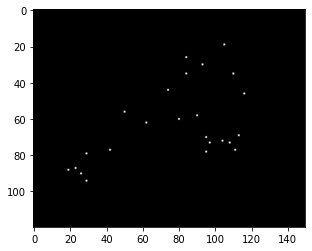

In [22]:

array_avr = ((array_1 + array_2 + array_3)//2)
plt.imshow(array_avr, cmap='gray')

- Array 이용하기. 임계값은 1으로 고정. array 값은 1로 잡아두기. 평균하였을 때 겹치치 않는 값은 버리기 위함


In [23]:
# Array 이용하기. 임계값은 1으로 고정. array 값은 1로 잡아두기. 평균하였을 때 겹치치 않는 값은 버리기 위함
def compute_fast_array(filename, is_nms=True, thresh =1): # thresh는 임계 값(t),

    img = cv2.imread(filename)

    # Initiate FAST object with default values # 디텍터 초기화
    fast = cv2.FastFeatureDetector_create() 
    # find and draw the keypoints 
    if not is_nms:
        fast.setNonmaxSuppression(0)
    fast.setThreshold(thresh) #임계값 적용
    kp = fast.detect(img,None) # 검출 
    array = np.zeros((120, 150))
    for i, feature in enumerate(kp):
        x = int(feature.pt[0])
        y = int(feature.pt[1])
        array[y][x] = 1
        
    return array

(-0.5, 149.5, 119.5, -0.5)

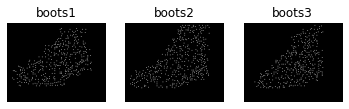

In [24]:
import os 
import cv2
import numpy as np
from matplotlib import pyplot as plt

img1 ='data_new/boots1.jpg'
img2 ='data_new/boots2.jpg'
img3 ='data_new/boots3.jpg'
array_1 = compute_fast_array(img1)
array_2 = compute_fast_array(img2)
array_3 = compute_fast_array(img3)

fig, ax = plt.subplots(nrows=1, ncols=3)

ax[0].imshow(array_1, cmap = 'gray')
ax[0].set_title('boots1')
ax[0].axis('off')

ax[1].imshow(array_2, cmap='gray')
ax[1].set_title('boots2')
ax[1].axis('off')

ax[2].imshow(array_3, cmap='gray')
ax[2].set_title('boots3')
ax[2].axis('off')

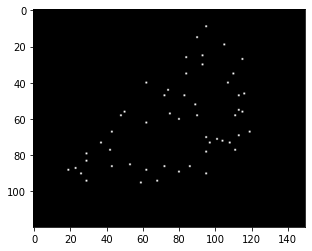

In [25]:
array_avr = ((array_1 + array_2 + array_3)//2)
plt.imshow(array_avr, cmap='gray')

## 1. 결론! 
  - threshold가 1이고, 2로 나누었을 때, 즉 세개 중 두개의 값이 겹쳐진 부분이 유효할 때 의미있는 이미지를 가진다.
  - 이 결과로 boots1, boots2, boots3 비교를 해보자

## 2. 평균과 boots1, boots2, boots3의 유사도를 비교해보자

In [26]:
# Array 이용하기. 임계값은 1으로 고정. array 값은 1로 잡아두기. 평균하였을 때 겹치치 않는 값은 버리기 위함
def compute_fast_array(filename, is_nms=True, thresh =1): # thresh는 임계 값(t),

    img = cv2.imread(filename)

    # Initiate FAST object with default values # 디텍터 초기화
    fast = cv2.FastFeatureDetector_create() 
    # find and draw the keypoints 
    if not is_nms:
        fast.setNonmaxSuppression(0)
    fast.setThreshold(thresh) #임계값 적용
    kp = fast.detect(img,None) # 검출 
    array = np.zeros((120, 150))
    for i, feature in enumerate(kp):
        x = int(feature.pt[0])
        y = int(feature.pt[1])
        array[y][x] = 1
        
    return array

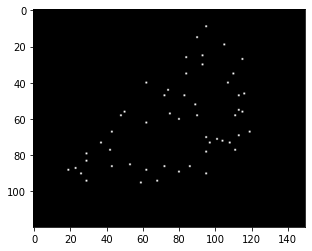

In [27]:
import os 
import cv2
import numpy as np
from matplotlib import pyplot as plt

img1 ='data_new/boots1.jpg'
img2 ='data_new/boots2.jpg'
img3 ='data_new/boots3.jpg'
array_1 = compute_fast_array(img1)
array_2 = compute_fast_array(img2)
array_3 = compute_fast_array(img3)
array_avr = ((array_1 + array_2 + array_3)//2)
plt.imshow(array_avr, cmap='gray')

In [28]:
array_avr 

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [29]:
from numpy import dot
from numpy.linalg import norm
import numpy as np
def cos_sim(A, B):
       return (dot(A.T, B))/(norm(A)*norm(B))

In [30]:
# 평균과 boots1의 비교
cos_sim(array_avr, array_1)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [31]:
dot(array_avr.T, array_1)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])